In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from matplotlib import rc
from scipy import optimize
from scipy.optimize import curve_fit
rc('font',**{'size':16})
rc('lines', **{'linewidth':3.0})
rc('savefig', **{'facecolor':'white'})
rc('axes', **{'labelsize':16})
rc('xtick', **{'direction':'in', 'top':True, 'minor.visible':True})
rc('ytick', **{'direction':'in', 'right':True, 'minor.visible':True})

Notice log scale for x. Notice huge jump. What's going on with error bars?


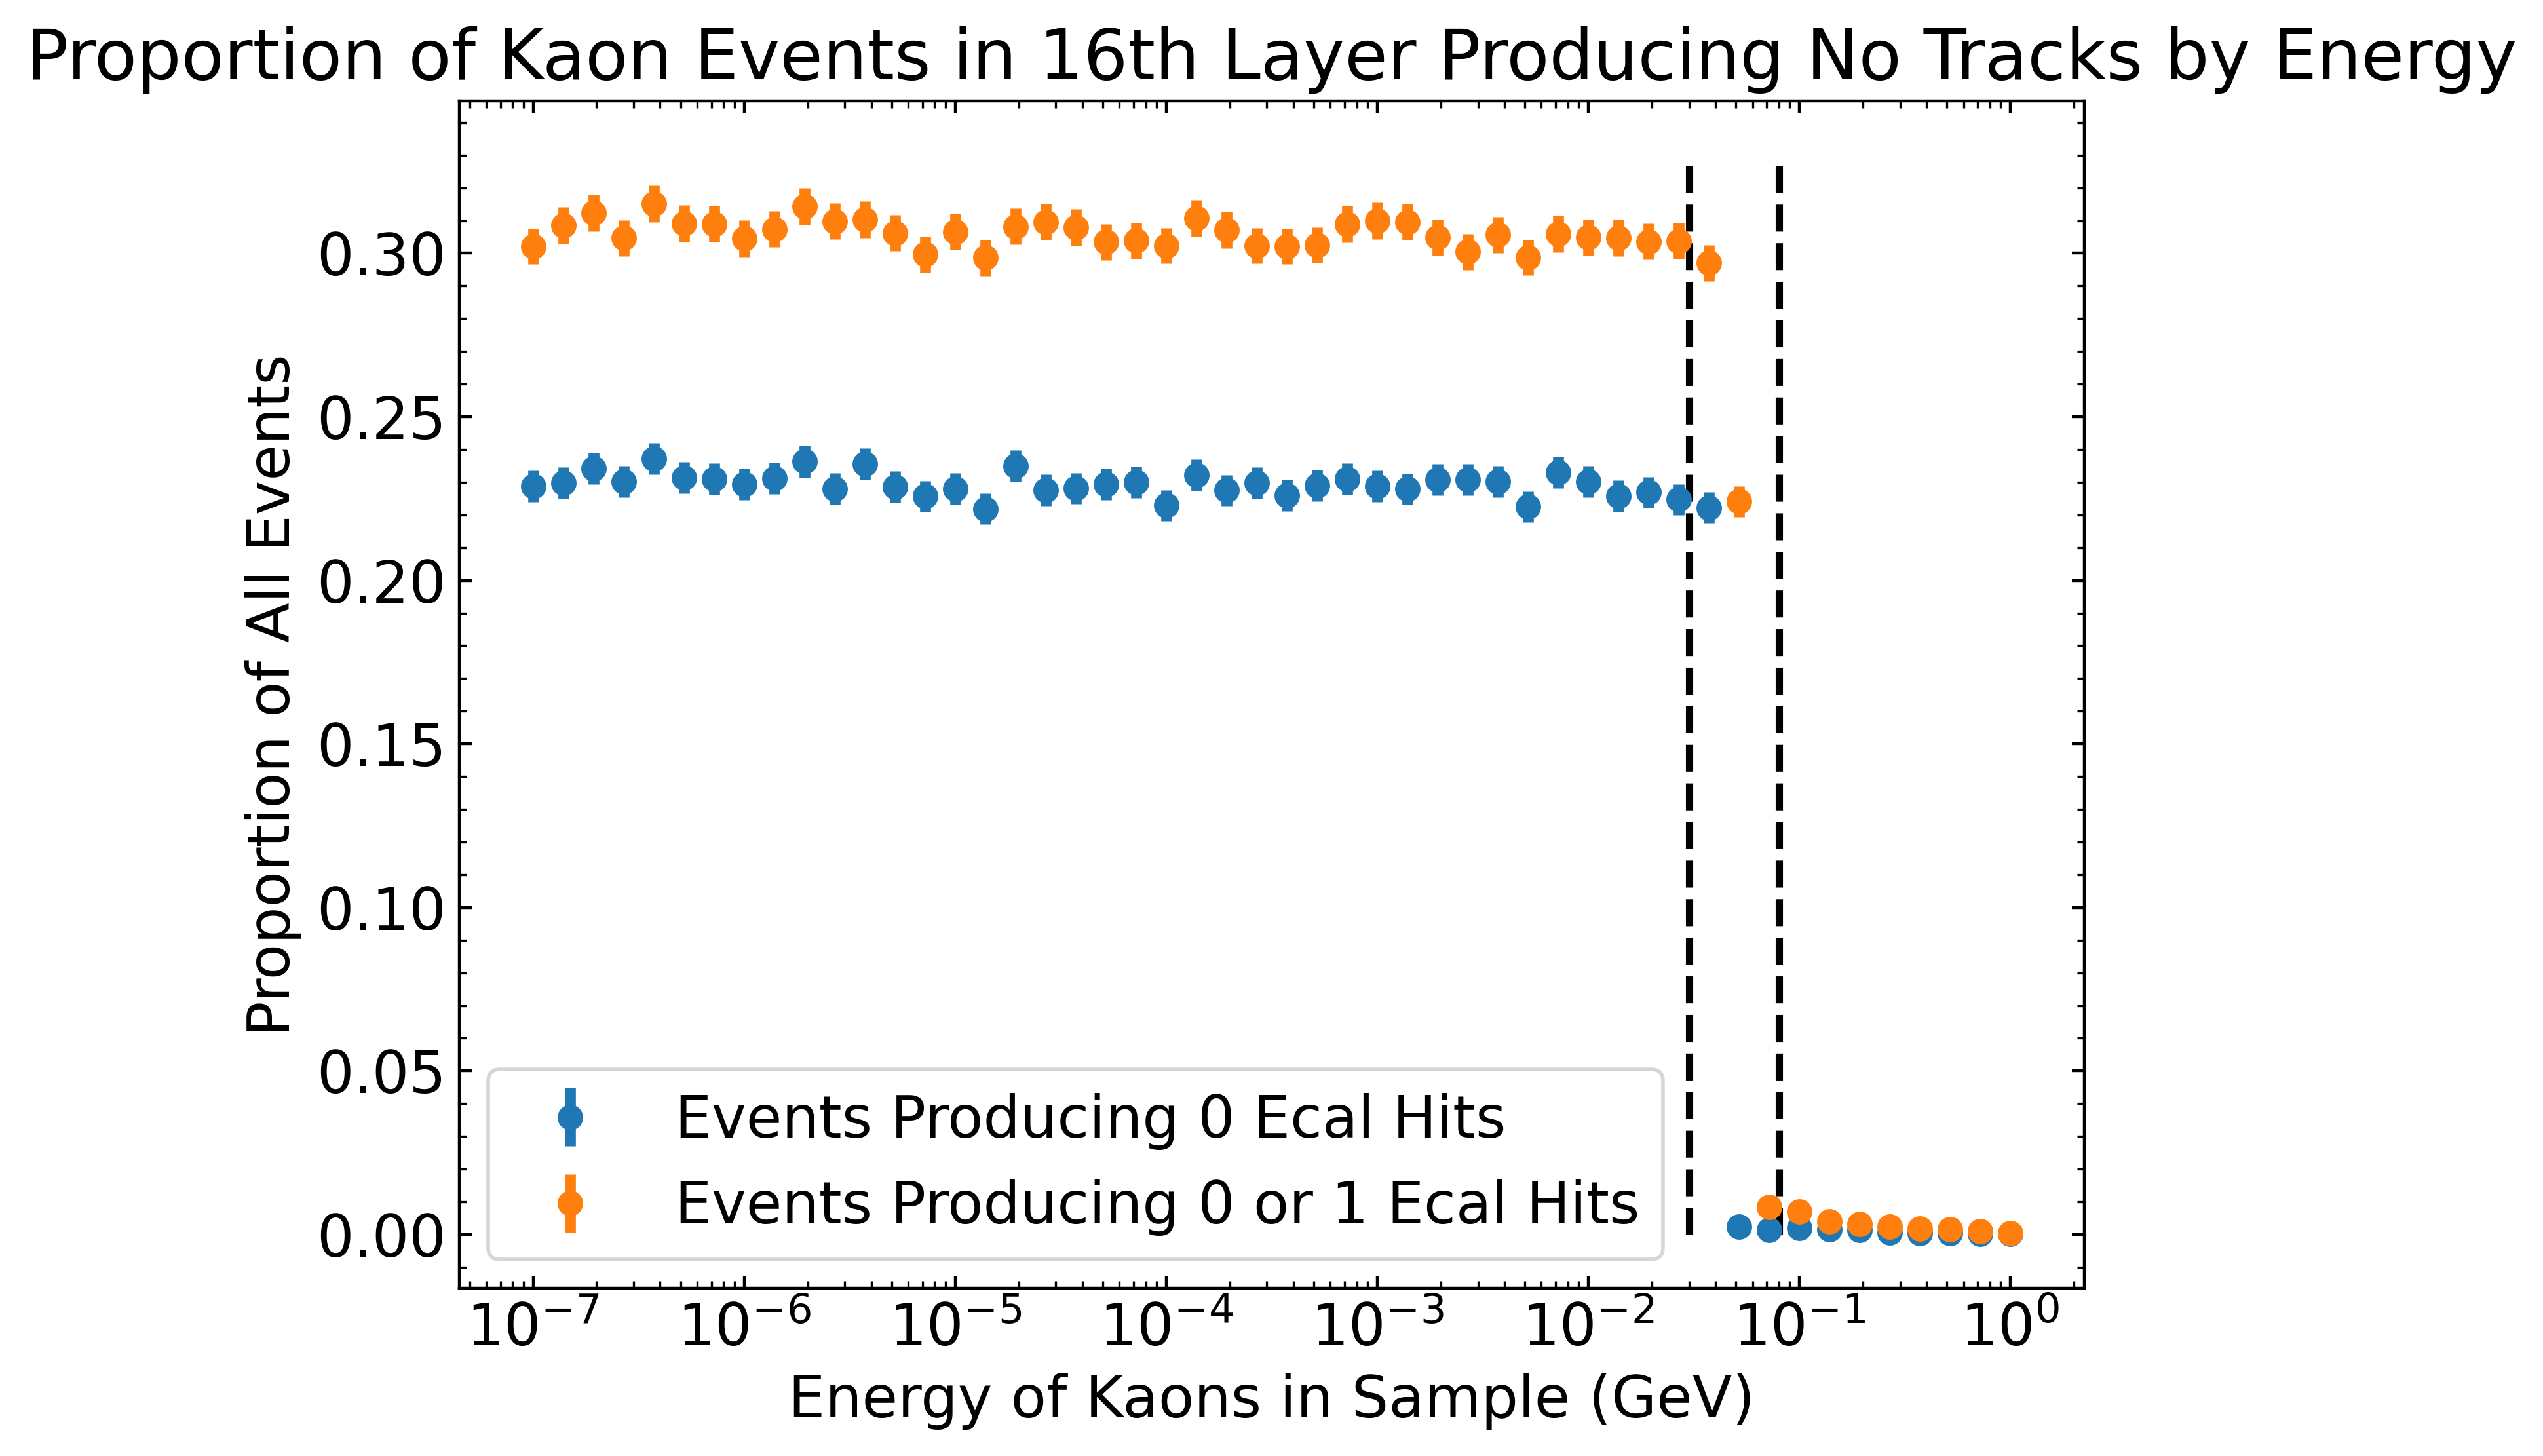

In [71]:
# import data
data = np.genfromtxt('/Users/chris/Desktop/percnohitsbyenergy.txt',delimiter=',')
energy = data[0:,0]
perczero = data[0:,1]
percnotracks = data[0:,2]
numevents = 10000
numzeros = perczero * numevents
err_numzeros = np.sqrt(numzeros)
err_zero = err_numzeros/numevents # in units of percent of 1
err_notracks = np.sqrt(percnotracks/numevents) # in units of percent of 1

plt.figure(figsize=(8,6),dpi=400)
plt.ylabel("Proportion of All Events")
plt.xlabel("Energy of Kaons in Sample (GeV)")
plt.title("Proportion of Kaon Events in 16th Layer Producing No Tracks by Energy")
plt.xscale('log')
plt.errorbar(energy,perczero,yerr=err_zero,marker='o',linestyle='',label='Events Producing 0 Ecal Hits')
plt.errorbar(energy,percnotracks,yerr=err_notracks,marker='o',linestyle='',label='Events Producing 0 or 1 Ecal Hits')
plt.legend()
# draw dotted lines in critical region
line1 = np.full(2,0.03)
line2 = np.full(2,0.08)
region = [0,0.33]
plt.plot(line1,region,'--',color='black',linewidth=2)
plt.plot(line2,region,'--',color='black',linewidth=2)
print("Notice log scale for x. Notice huge jump. What's going on with error bars?")

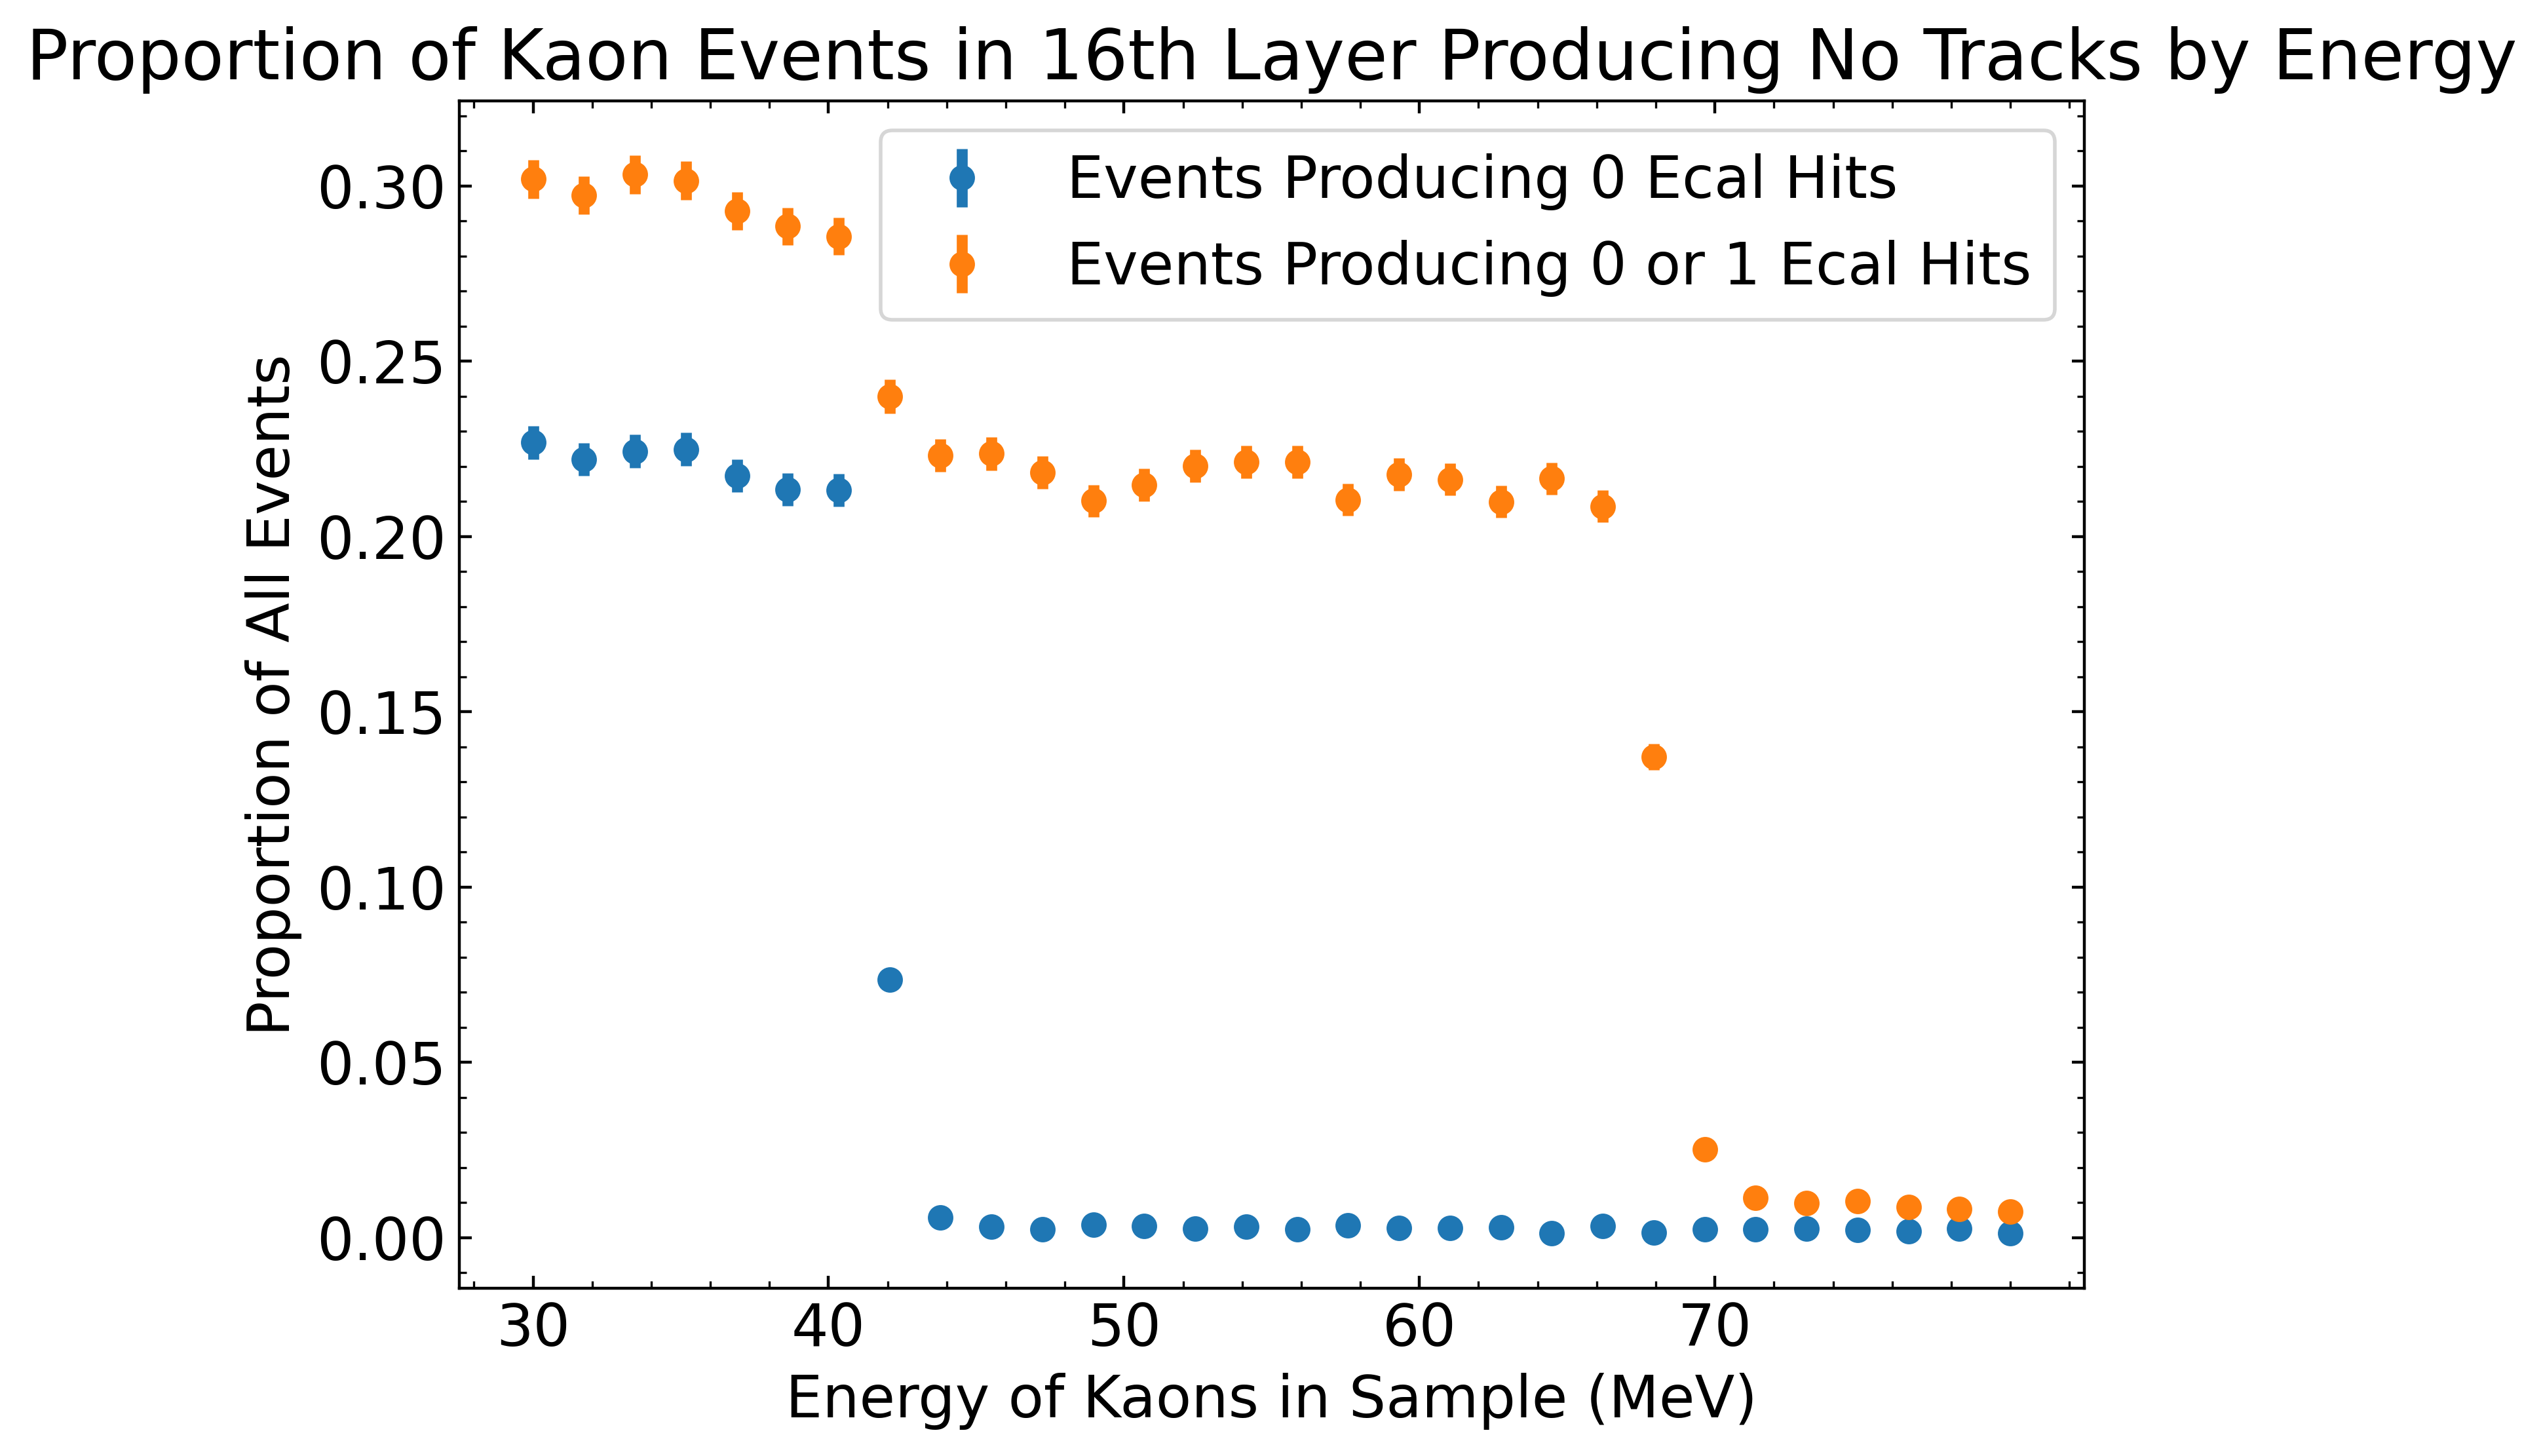

In [81]:
# import data
data1 = np.genfromtxt('/Users/chris/Desktop/linearpercnohitsbyenergy.txt',delimiter=',')
energy1 = data1[0:,0] * 1000
perczero1 = data1[0:,1]
percnotracks1 = data1[0:,2]
numevents = 10000
err_zero1 = np.sqrt(perczero1/numevents) # in units of percent of 1
err_notracks1 = np.sqrt(percnotracks1/numevents) # in units of percent of 1

plt.figure(figsize=(8,6),dpi=400)
plt.ylabel("Proportion of All Events")
plt.xlabel("Energy of Kaons in Sample (MeV)")
plt.title("Proportion of Kaon Events in 16th Layer Producing No Tracks by Energy")
plt.ticklabel_format(style='plain')
plt.xticks([30,40,50,60,70])
plt.errorbar(energy1,perczero1,yerr=err_zero1,marker='o',linestyle='',label='Events Producing 0 Ecal Hits')
plt.errorbar(energy1,percnotracks1,yerr=err_notracks1,marker='o',linestyle='',label='Events Producing 0 or 1 Ecal Hits')
plt.legend()

In [33]:
# figure out why error bars are so different on this one
# figure out what the hell could be causing this jump
# make a sample that's just in this tiny range.
# 38mev to 43 mev - 50 samples.

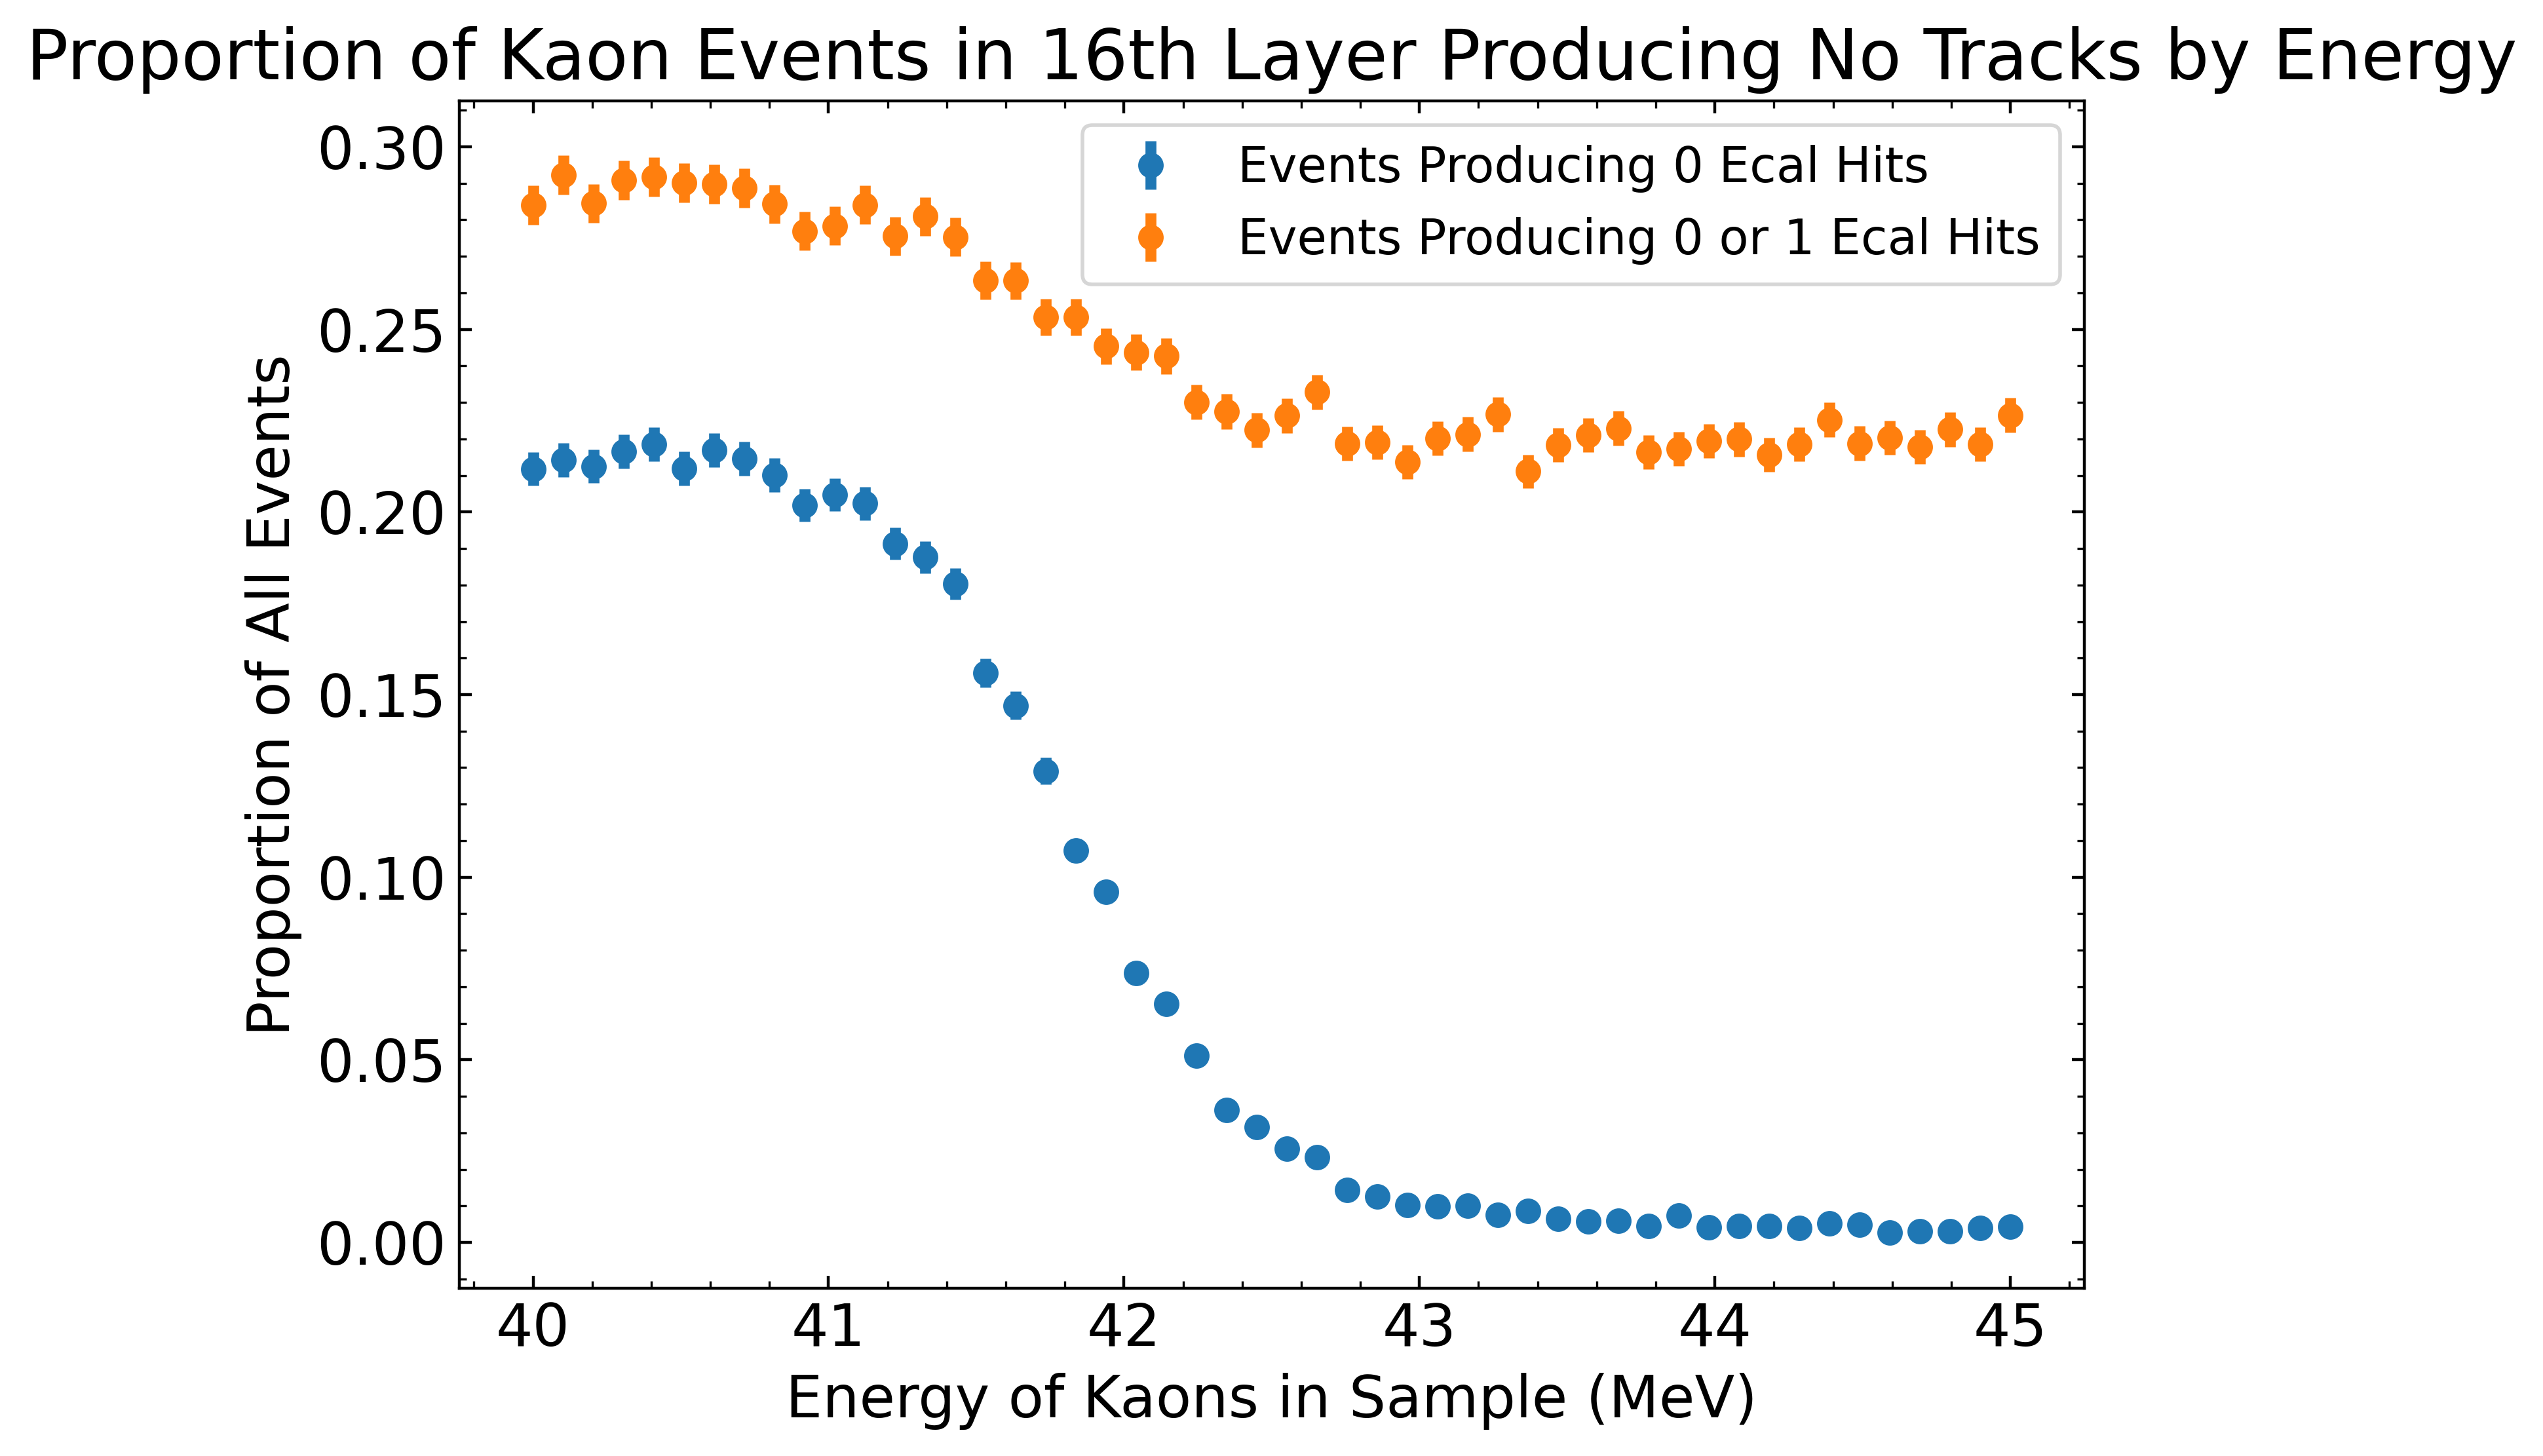

In [91]:
# import data
data2 = np.genfromtxt('/Users/chris/Desktop/newlinearpercnohitsbyenergy.txt',delimiter=',')
energy2 = data2[0:,0] * 1000 #MeV
perczero2 = data2[0:,1]
percnotracks2 = data2[0:,2]
numevents = 10000
err_zero2 = np.sqrt(perczero2/numevents) # in units of percent of 1
err_notracks2 = np.sqrt(percnotracks2/numevents) # in units of percent of 1

plt.figure(figsize=(8,6),dpi=400)
plt.ylabel("Proportion of All Events")
plt.xlabel("Energy of Kaons in Sample (MeV)")
plt.title("Proportion of Kaon Events in 16th Layer Producing No Tracks by Energy")
plt.ticklabel_format(style='plain')
plt.errorbar(energy2,perczero2,yerr=err_zero2,marker='o',linestyle='',label='Events Producing 0 Ecal Hits')
plt.errorbar(energy2,percnotracks2,yerr=err_notracks2,marker='o',linestyle='',label='Events Producing 0 or 1 Ecal Hits')
plt.legend(loc="upper right",fontsize='small')

In [55]:
numzeros = perczero * numevents
errnozeros = np.sqrt(numzeros)
percerr = errnozeros / 10000
print(percerr)
print(err_zero1)

[0.00478226 0.00479375 0.00483942 0.00479687 0.00487032 0.00480937
 0.00480625 0.00478853 0.00480729 0.00486107 0.00477493 0.00485386
 0.00478121 0.00475079 0.00477493 0.00470956 0.00484768 0.00477074
 0.00477598 0.00478957 0.00479479 0.00472123 0.00481768 0.0047697
 0.0047927  0.00475395 0.00478539 0.00480625 0.00478226 0.00477389
 0.00480312 0.00480312 0.00479687 0.00471699 0.00482701 0.00479792
 0.00475184 0.0047634  0.00474025 0.00471381 0.00047958 0.00036056
 0.00044721 0.0003873  0.00037417 0.00024495 0.0002     0.00017321
 0.0001     0.00014142]
[0.00476235 0.00471169 0.00473603 0.00474236 0.00466154 0.00461952
 0.00461736 0.00271109 0.00076158 0.00055678 0.0004899  0.0006
 0.00057446 0.0005     0.00054772 0.0004899  0.00059161 0.00051962
 0.00052915 0.00053852 0.00034641 0.00057446 0.0003873  0.0004899
 0.00047958 0.0005     0.00045826 0.00041231 0.0005     0.00034641]


In [3]:
# analyze pdgids for 40mev sample and 45mev sample
# import data from file
ids40 = np.genfromtxt('/Users/chris/Desktop/pdgIDs_40mev.txt',delimiter=',')

def getparticles(pdgids):
    # define particles
    muplus = 0
    muminus = 0
    kplus = 0 
    eminus = 0
    eplus = 0
    gamma = 0
    n0 = 0
    piplus = 0
    piminus = 0 
    pplus = 0
    nuclei = 0 
    others = 0
    print(len(pdgids))
    for i in range(len(pdgids)):
        if pdgids[i] == -13:
            muplus += 1
        elif pdgids[i] == 13:
            muminus += 1
        elif pdgids[i] == 321:
            kplus += 1
        elif pdgids[i] == 11:
            eminus += 1
        elif pdgids[i] == -11:
            eplus += 1
        elif pdgids[i] == 22:
            gamma += 1
        elif pdgids[i] == 2112:
            n0 += 1
        elif pdgids[i] == 211:
            piplus += 1
        elif pdgids[i] == 2212:
            pplus += 1
        elif pdgids[i] == -211:
            piminus += 1 
        elif pdgids[i] > 1000000000:
            nuclei +=1
        else:
            others += 1
    pdglist = [muplus,muminus,kplus,eminus,eplus,piplus,n0,gamma,pplus,piminus,nuclei,others]
    return pdglist

# plot them


pcounts40 = getparticles(ids40)
print(pcounts40)
pnames = [r'$\mu^+$',r'$K^+$',r'$e^-$',r'$e^+$',r'$\pi^+$',r'$n^0$',
             r'$\gamma$', r'$p^+$', r'$\pi^-$','Nuclei','Other' ]

fig, ax = plt.subplots(figsize =(10, 7),dpi=300)
wedges, texts = ax.pie(pcounts40,labels=pnames,startangle=-90)
ax.legend(wedges, pnames,
          title ="Particles",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.title("Particles Causing Ecal Hits, 40MeV")

OSError: /Users/chris/Desktop/pdgIDs_40mev.txt not found.

103763
[33551, 9745, 33855, 15643, 5882, 2779, 1171, 388, 310, 436, 3]
103763


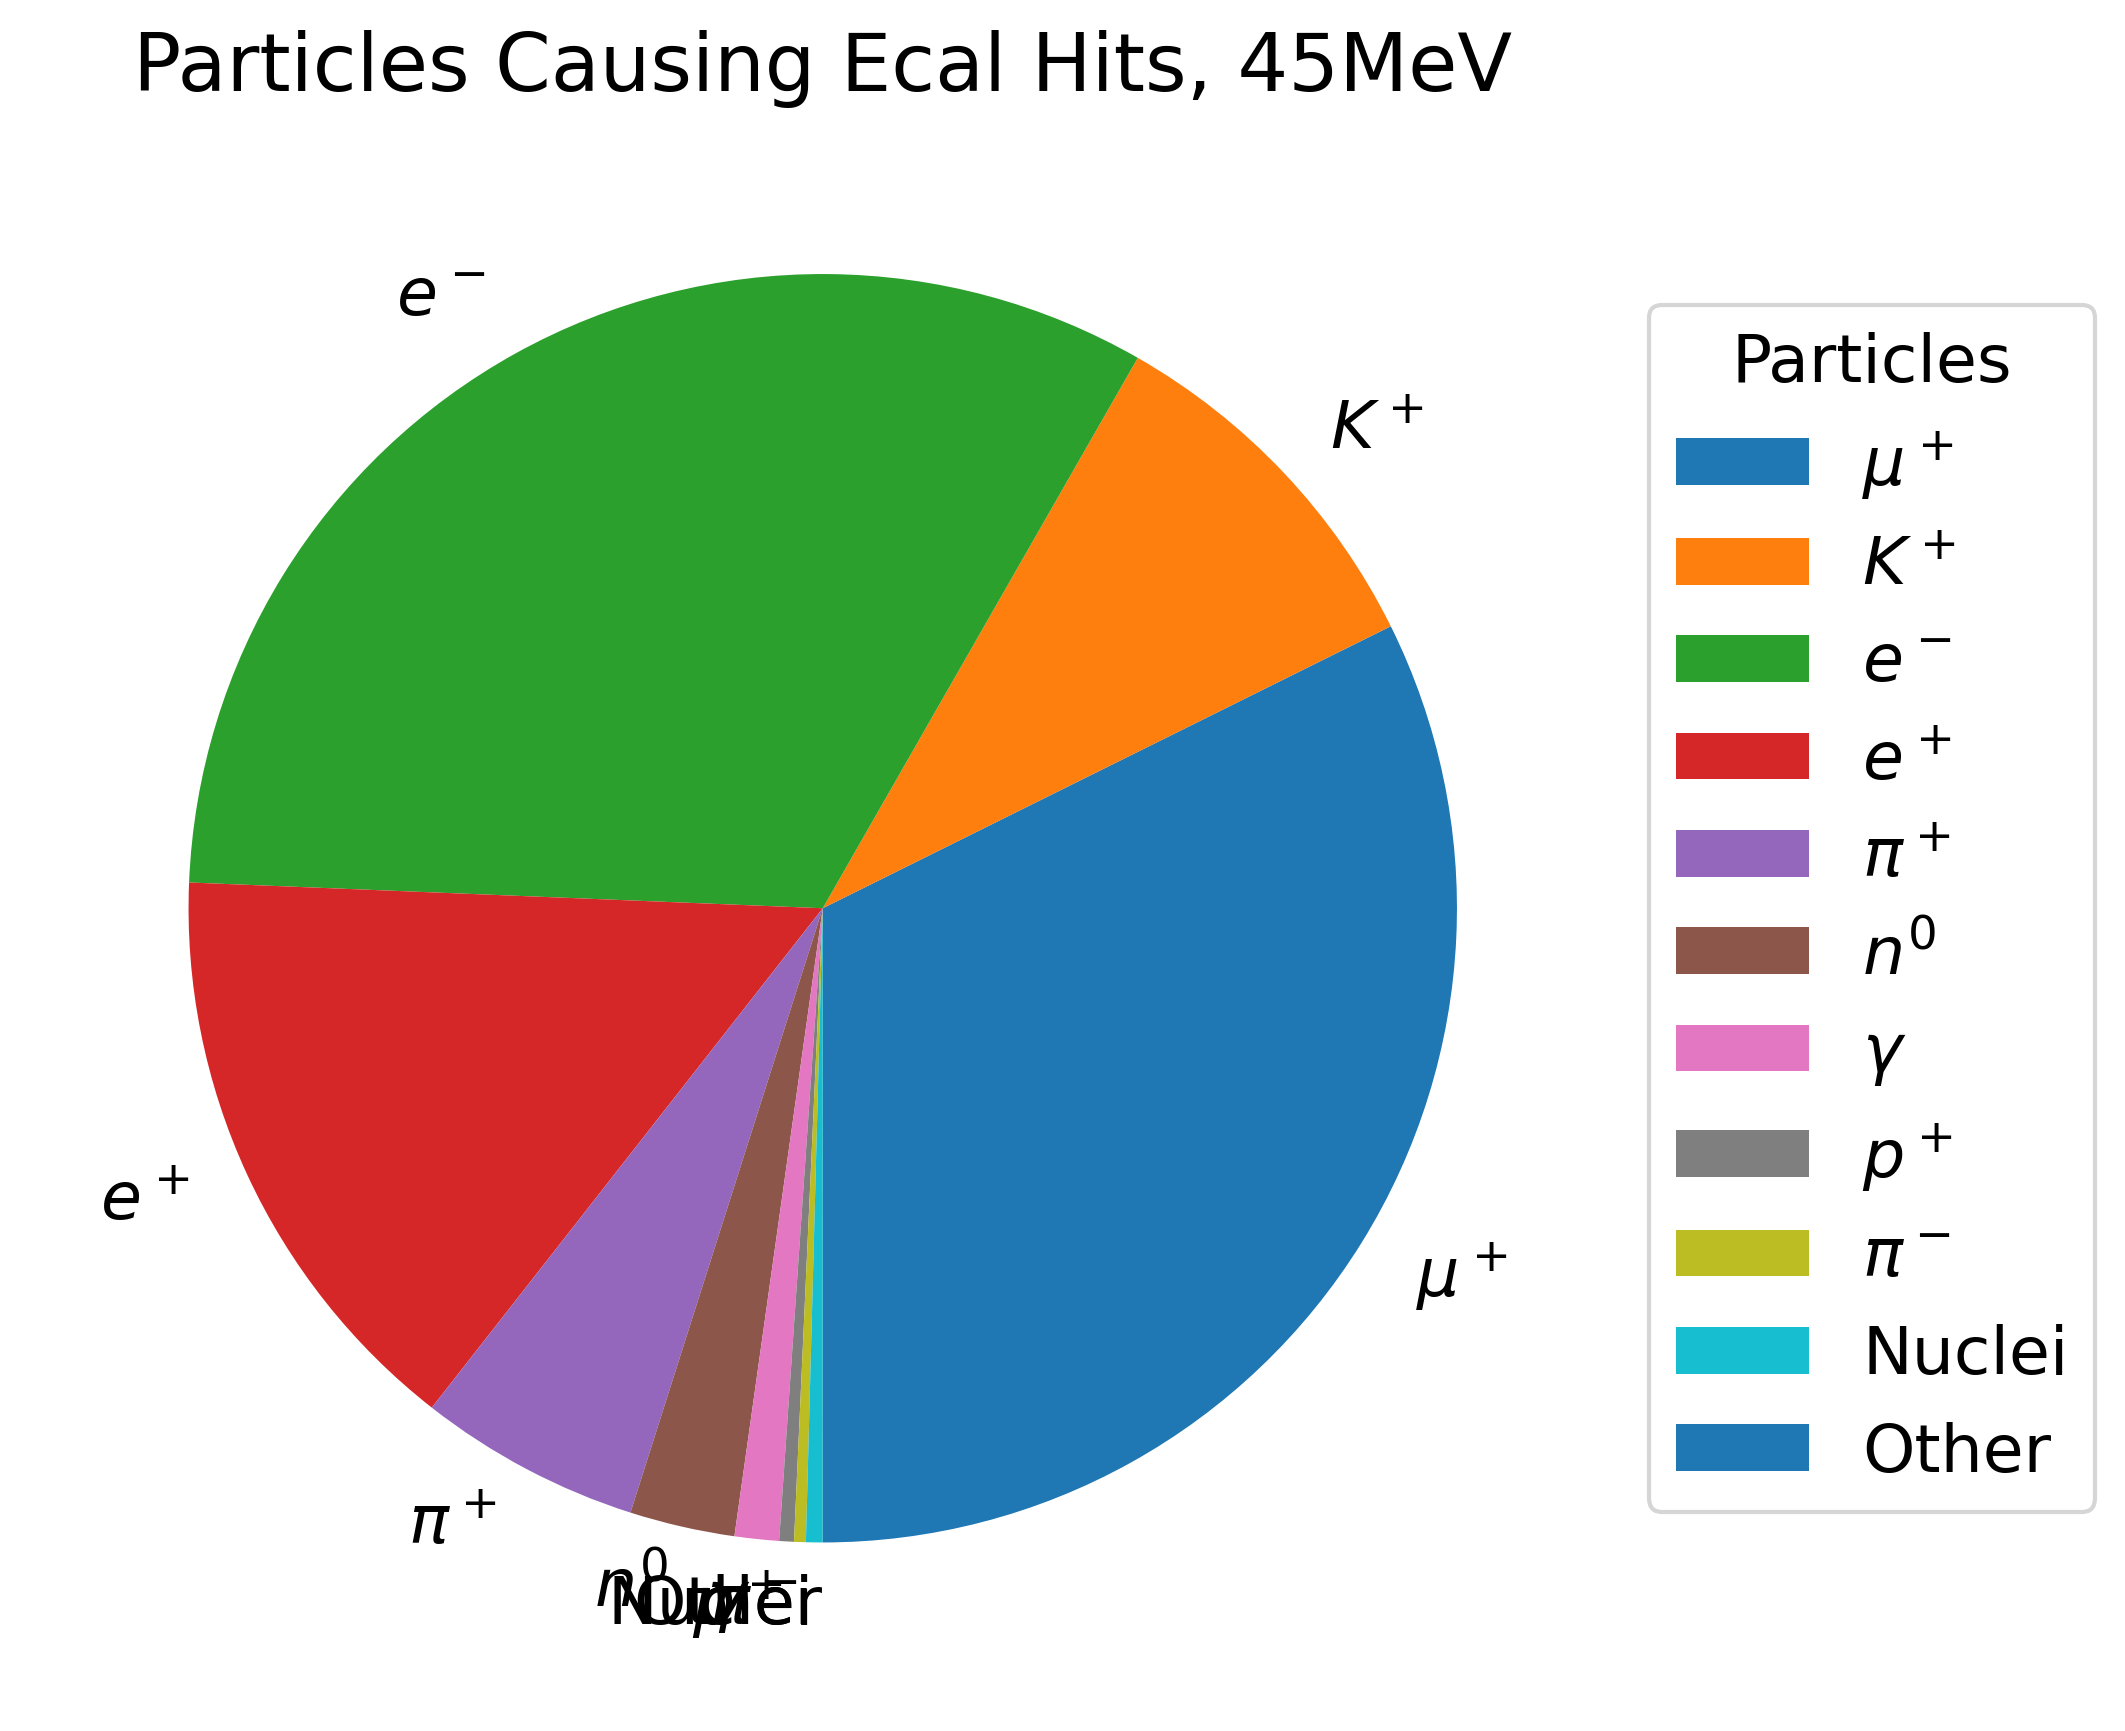

In [93]:
ids45 = np.genfromtxt('/Users/chris/Desktop/pdgIDs_45mev.txt',delimiter=',')

pcounts45 = getparticles(ids45)
print(pcounts45)
pnames = [r'$\mu^+$',r'$K^+$',r'$e^-$',r'$e^+$',r'$\pi^+$',r'$n^0$',
             r'$\gamma$', r'$p^+$', r'$\pi^-$','Nuclei','Other' ]

fig, ax = plt.subplots(figsize =(10, 7),dpi=300)
wedges, texts = ax.pie(pcounts45,labels=pnames,startangle=-90)
ax.legend(wedges, pnames,
          title ="Particles",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.title("Particles Causing Ecal Hits, 45MeV")
print(len(ids45))

114831
[32362, 20616, 34331, 15457, 5870, 3574, 1198, 486, 428, 499, 10]
114831


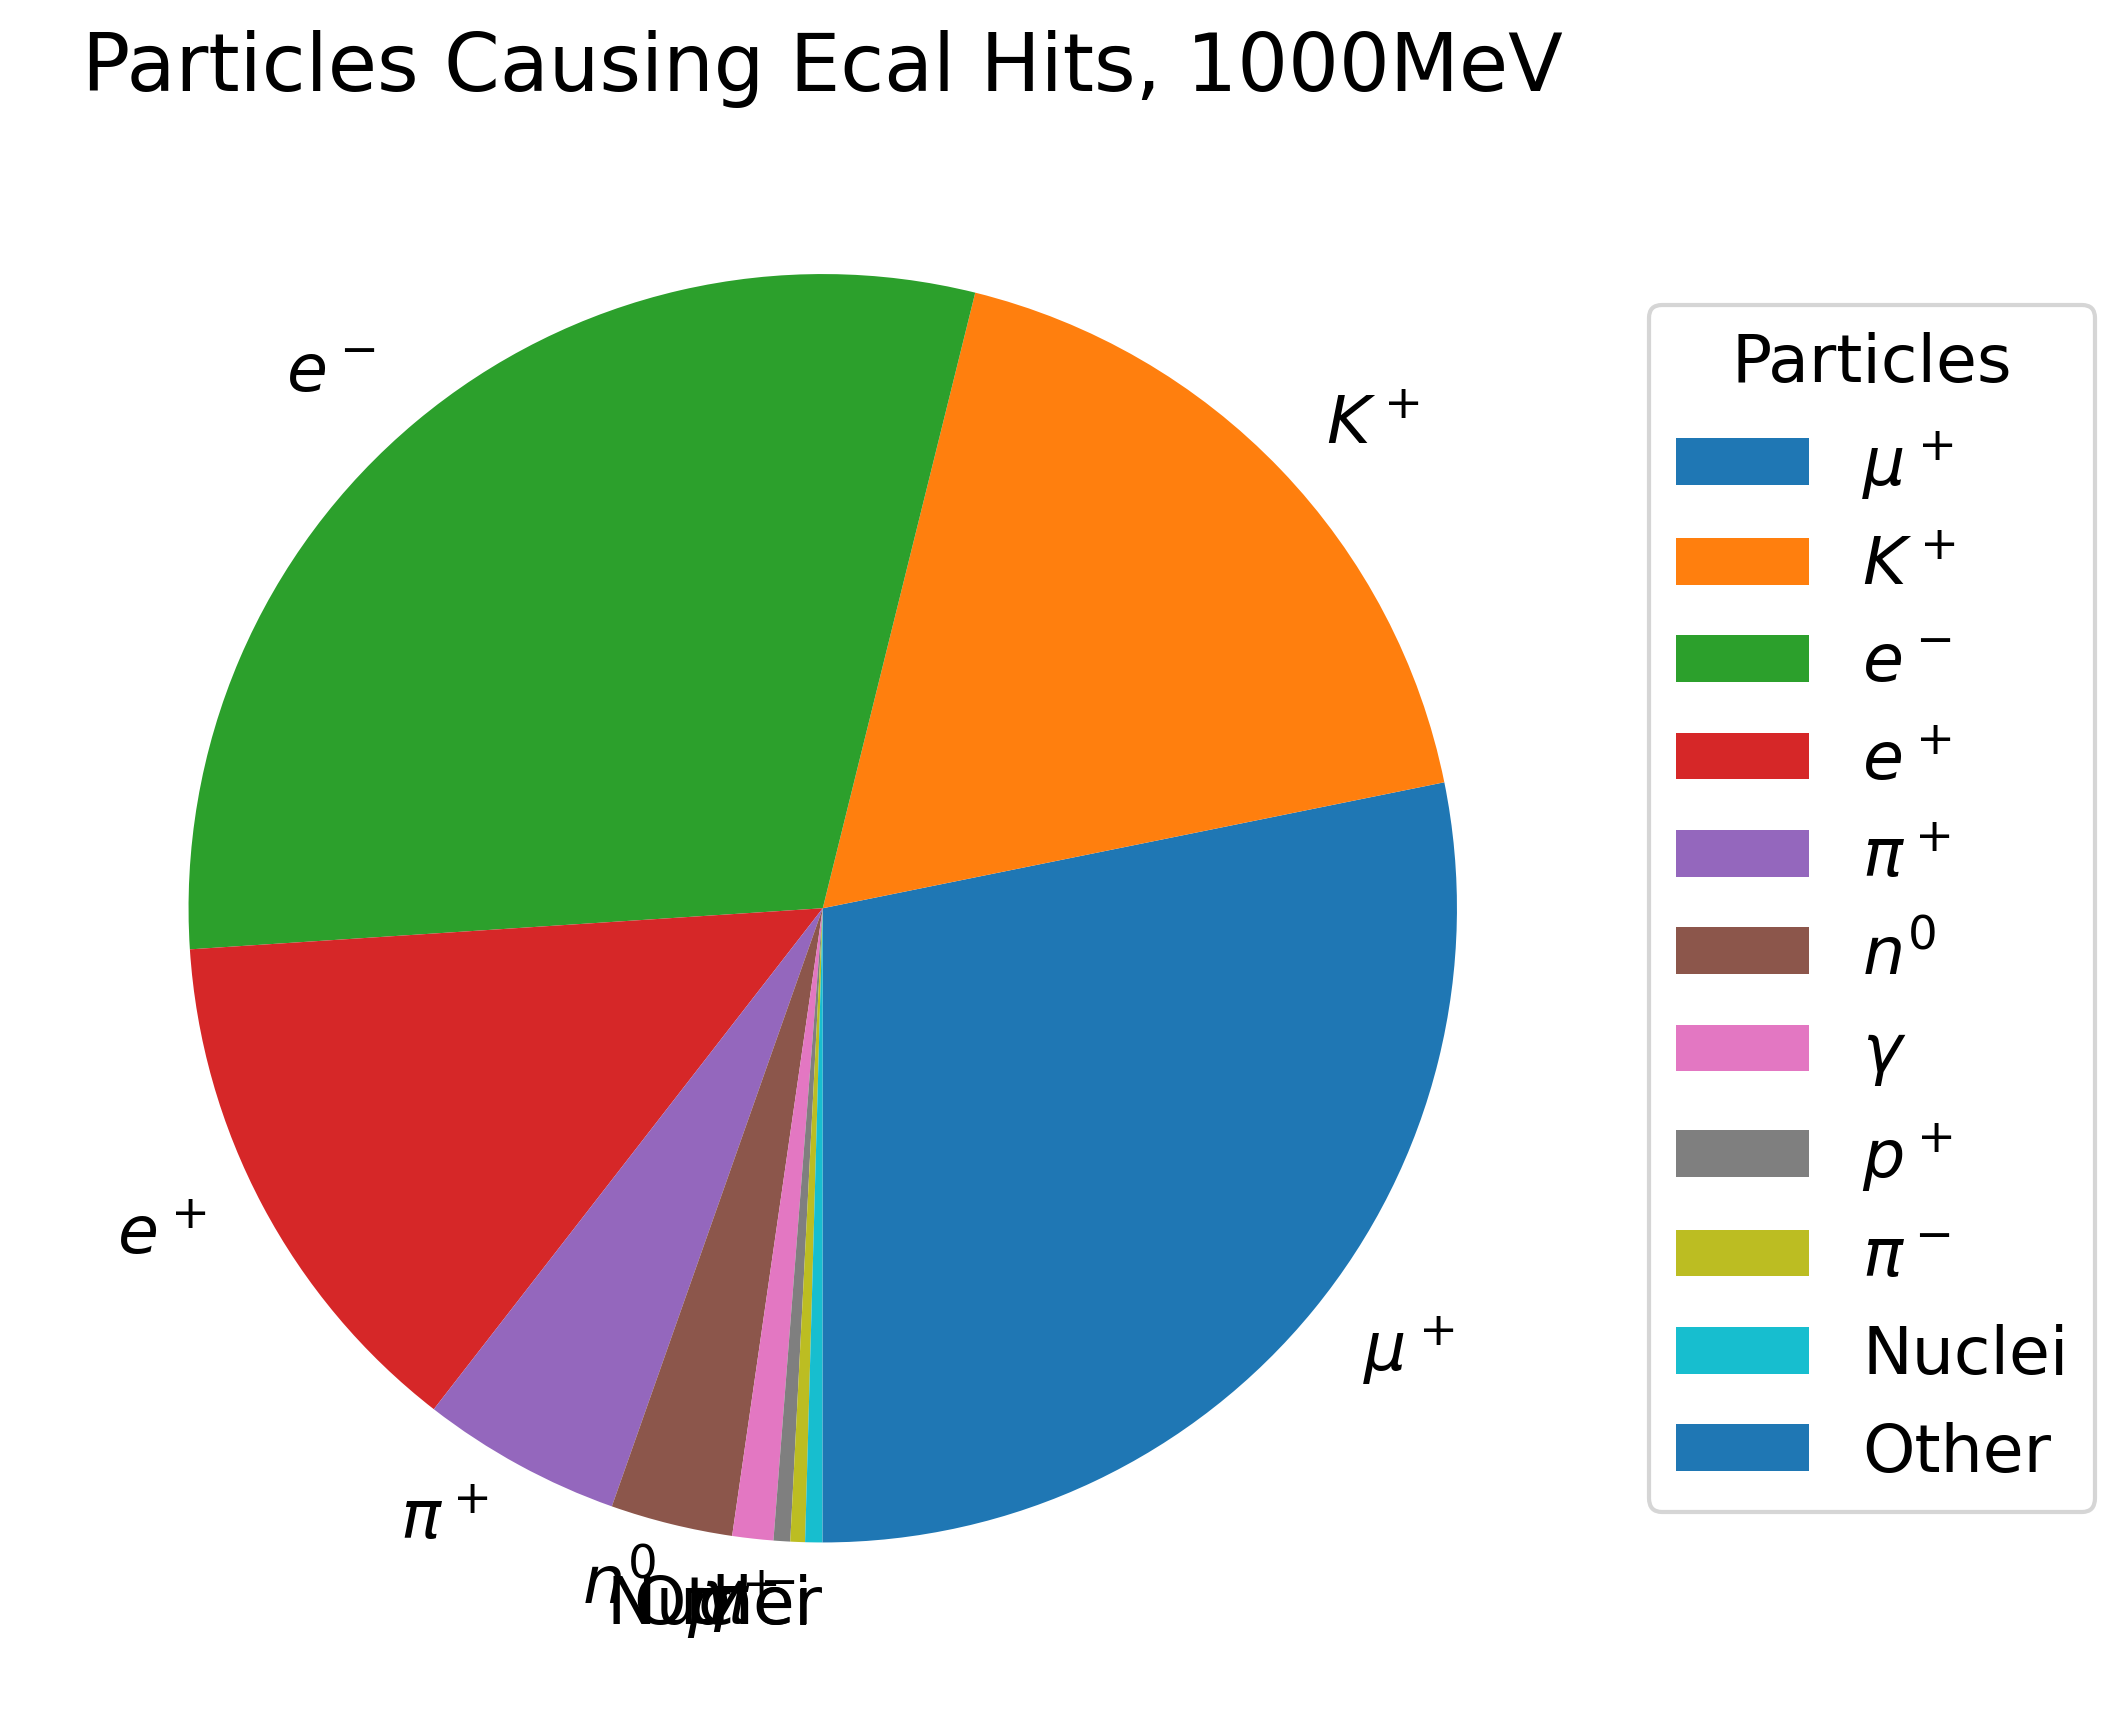

In [97]:
ids1000 = np.genfromtxt('/Users/chris/Desktop/pdgIDs_1000mev.txt',delimiter=',')

pcounts1000 = getparticles(ids1000)
print(pcounts1000)
pnames = [r'$\mu^+$',r'$K^+$',r'$e^-$',r'$e^+$',r'$\pi^+$',r'$n^0$',
             r'$\gamma$', r'$p^+$', r'$\pi^-$','Nuclei','Other' ]

fig, ax = plt.subplots(figsize =(10, 7),dpi=300)
wedges, texts = ax.pie(pcounts1000,labels=pnames,startangle=-90)
ax.legend(wedges, pnames,
          title ="Particles",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.title("Particles Causing Ecal Hits, 1000MeV")
print(len(ids1000))

61893
[5926, 5878, 32450, 11639, 43, 3583, 697, 728, 417, 446, 86]
61893


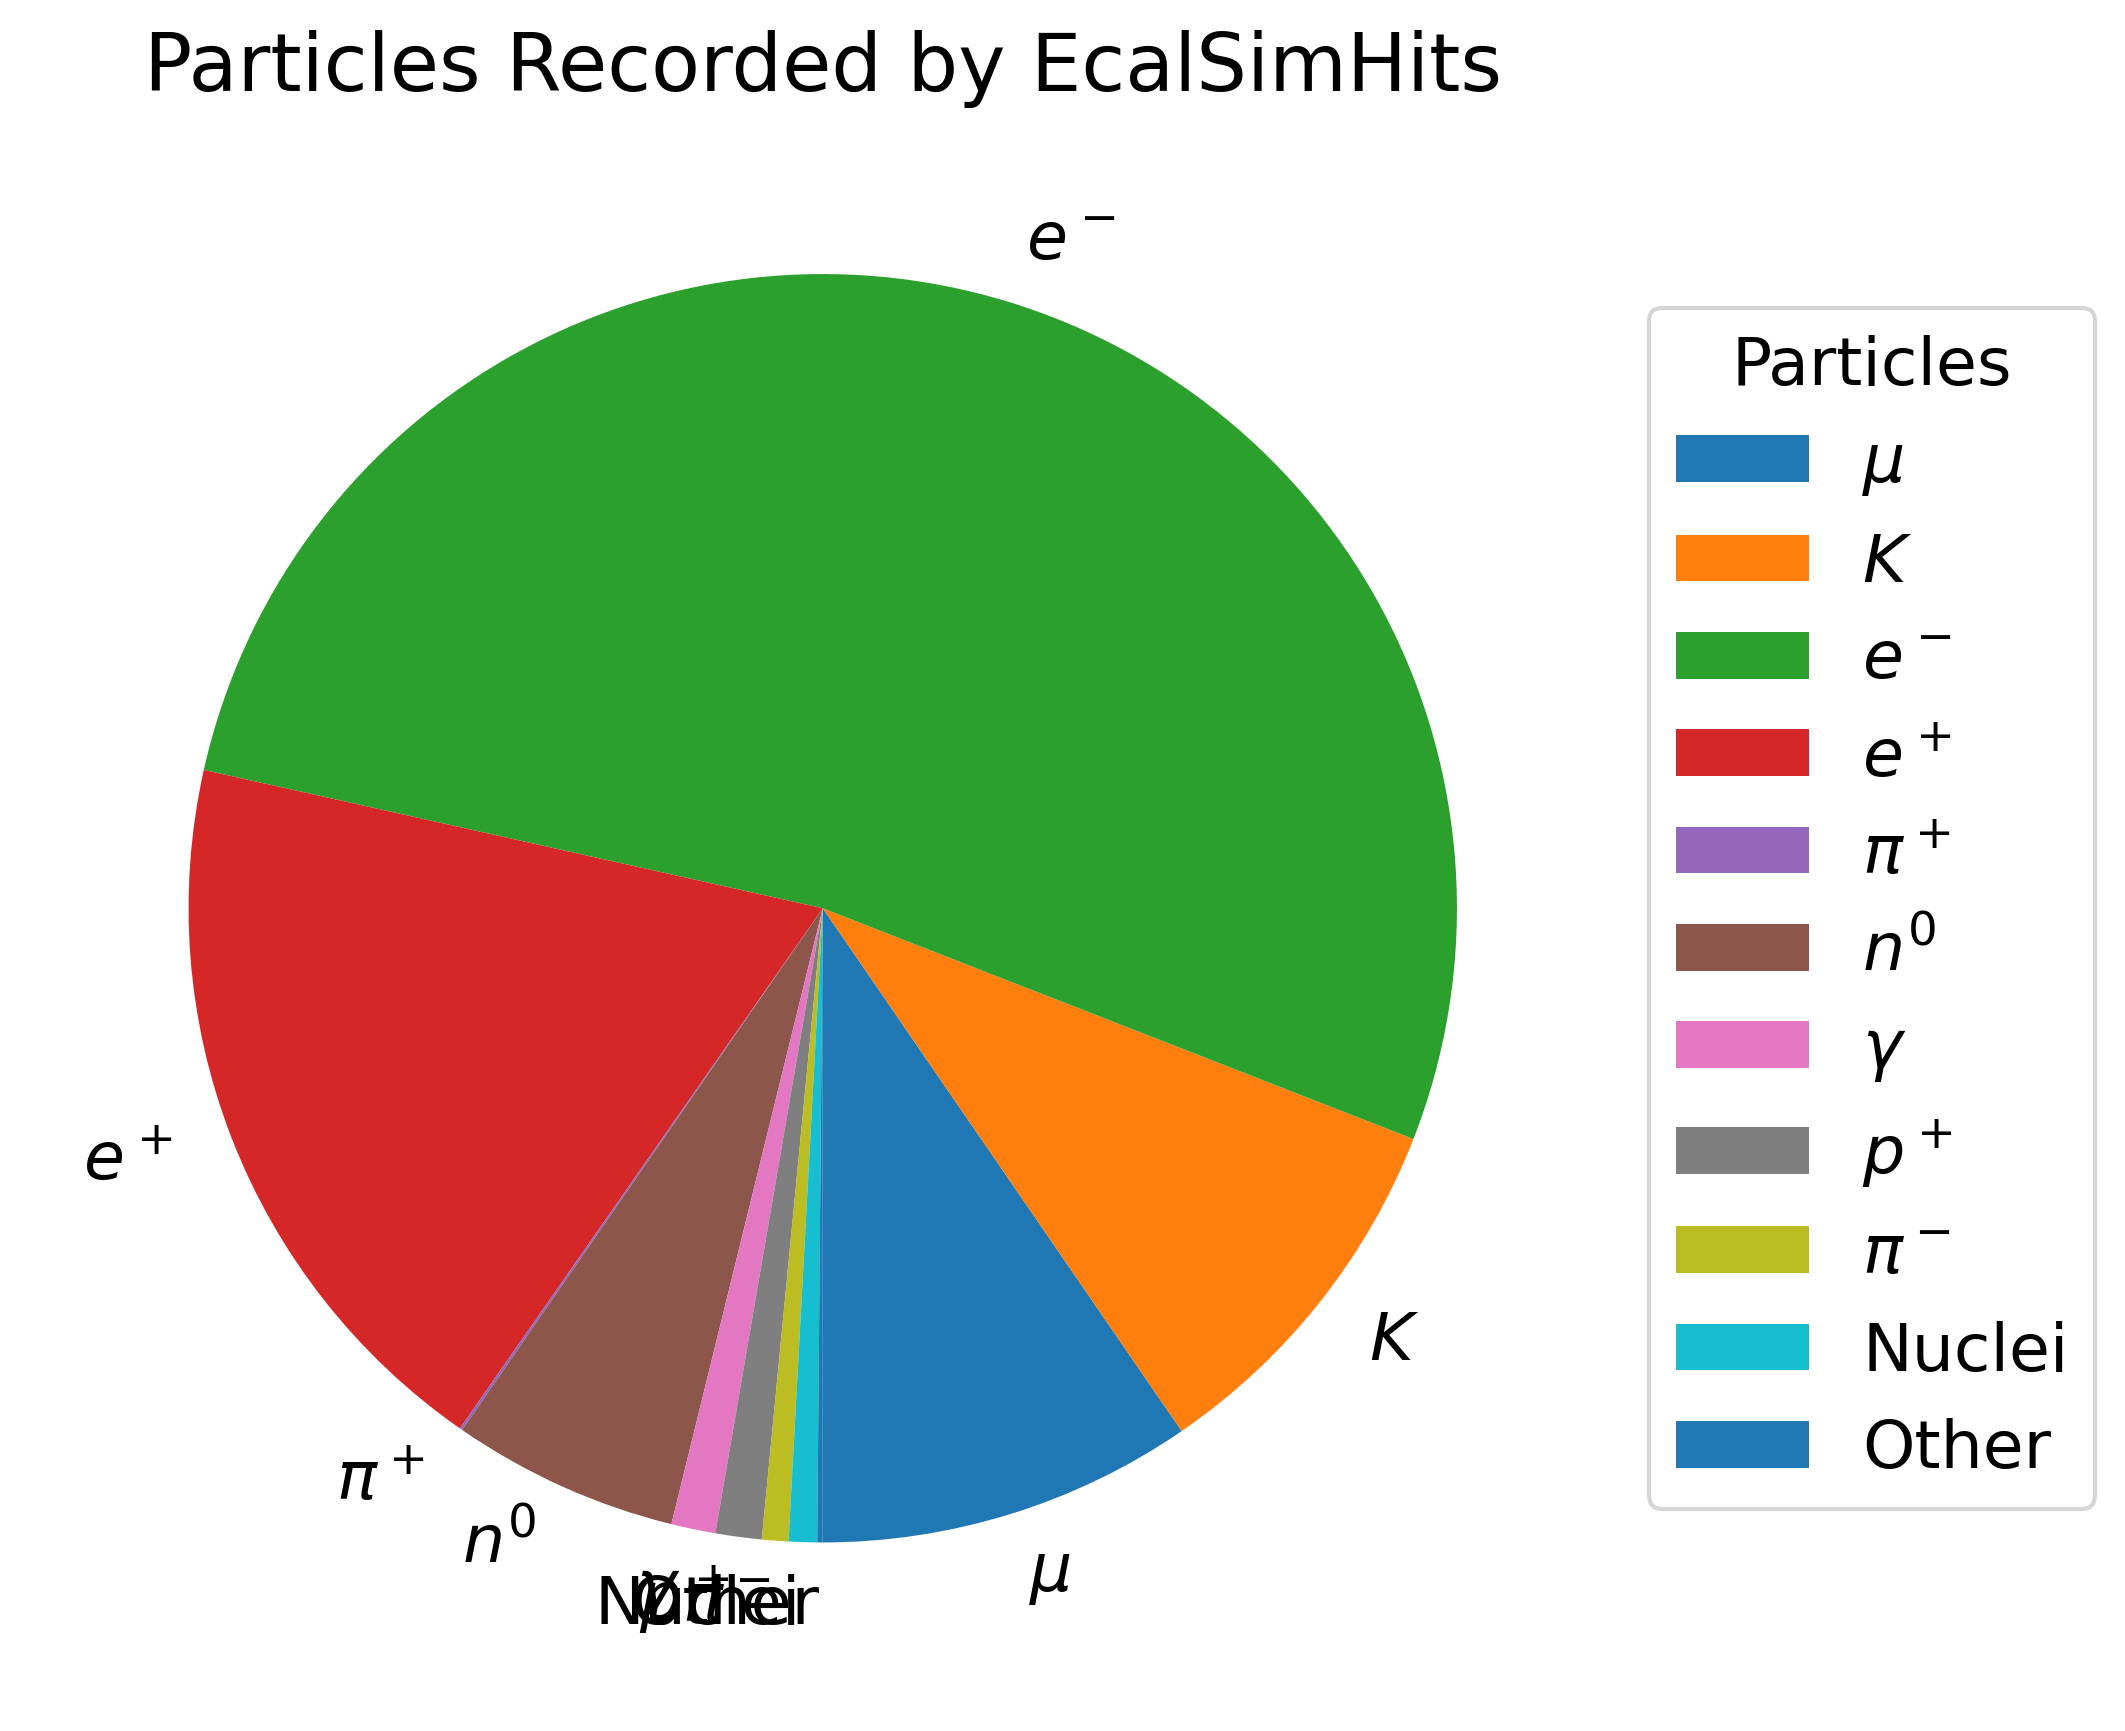

In [10]:
ids_danyi = np.genfromtxt('/Users/chris/Desktop/ldmx_files/pdgIDs_4gev_1e_tskim_v12_kaons_ldmx-det-v12_bdt_hcal_skimmed.txt',delimiter=',')

def getparticles(pdgids):
    # define particles
    mu = 0
    k = 0
    eminus = 0
    eplus = 0
    gamma = 0
    n0 = 0
    piplus = 0
    piminus = 0 
    pplus = 0
    nuclei = 0 
    others = 0
    print(len(pdgids))
    for i in range(len(pdgids)):
        if pdgids[i] == -13 or pdgids[i] == 13 :
            mu += 1
        elif pdgids[i] == 321 or pdgids[i] == -321:
            k += 1
        elif pdgids[i] == 11:
            eminus += 1
        elif pdgids[i] == -11:
            eplus += 1
        elif pdgids[i] == 22:
            gamma += 1
        elif pdgids[i] == 2112:
            n0 += 1
        elif pdgids[i] == 211:
            piplus += 1
        elif pdgids[i] == 2212:
            pplus += 1
        elif pdgids[i] == -211:
            piminus += 1 
        elif pdgids[i] > 1000000000:
            nuclei +=1
        else:
            others += 1
    pdglist = [mu,k,eminus,eplus,piplus,n0,gamma,pplus,piminus,nuclei,others]
    return pdglist


pcountsdanyi = getparticles(ids_danyi)
print(pcountsdanyi)
pnames = [r'$\mu$',r'$K$',r'$e^-$',r'$e^+$',r'$\pi^+$',r'$n^0$',
             r'$\gamma$', r'$p^+$', r'$\pi^-$','Nuclei','Other' ]

fig, ax = plt.subplots(figsize =(10, 7),dpi=300)
wedges, texts = ax.pie(pcountsdanyi,labels=pnames,startangle=-90)
ax.legend(wedges, pnames,
          title ="Particles",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.title("Particles Recorded by EcalSimHits")
print(len(ids_danyi))

20739
[6, 1092, 2577, 24, 23, 7524, 6787, 531, 263, 1393, 519]
20739


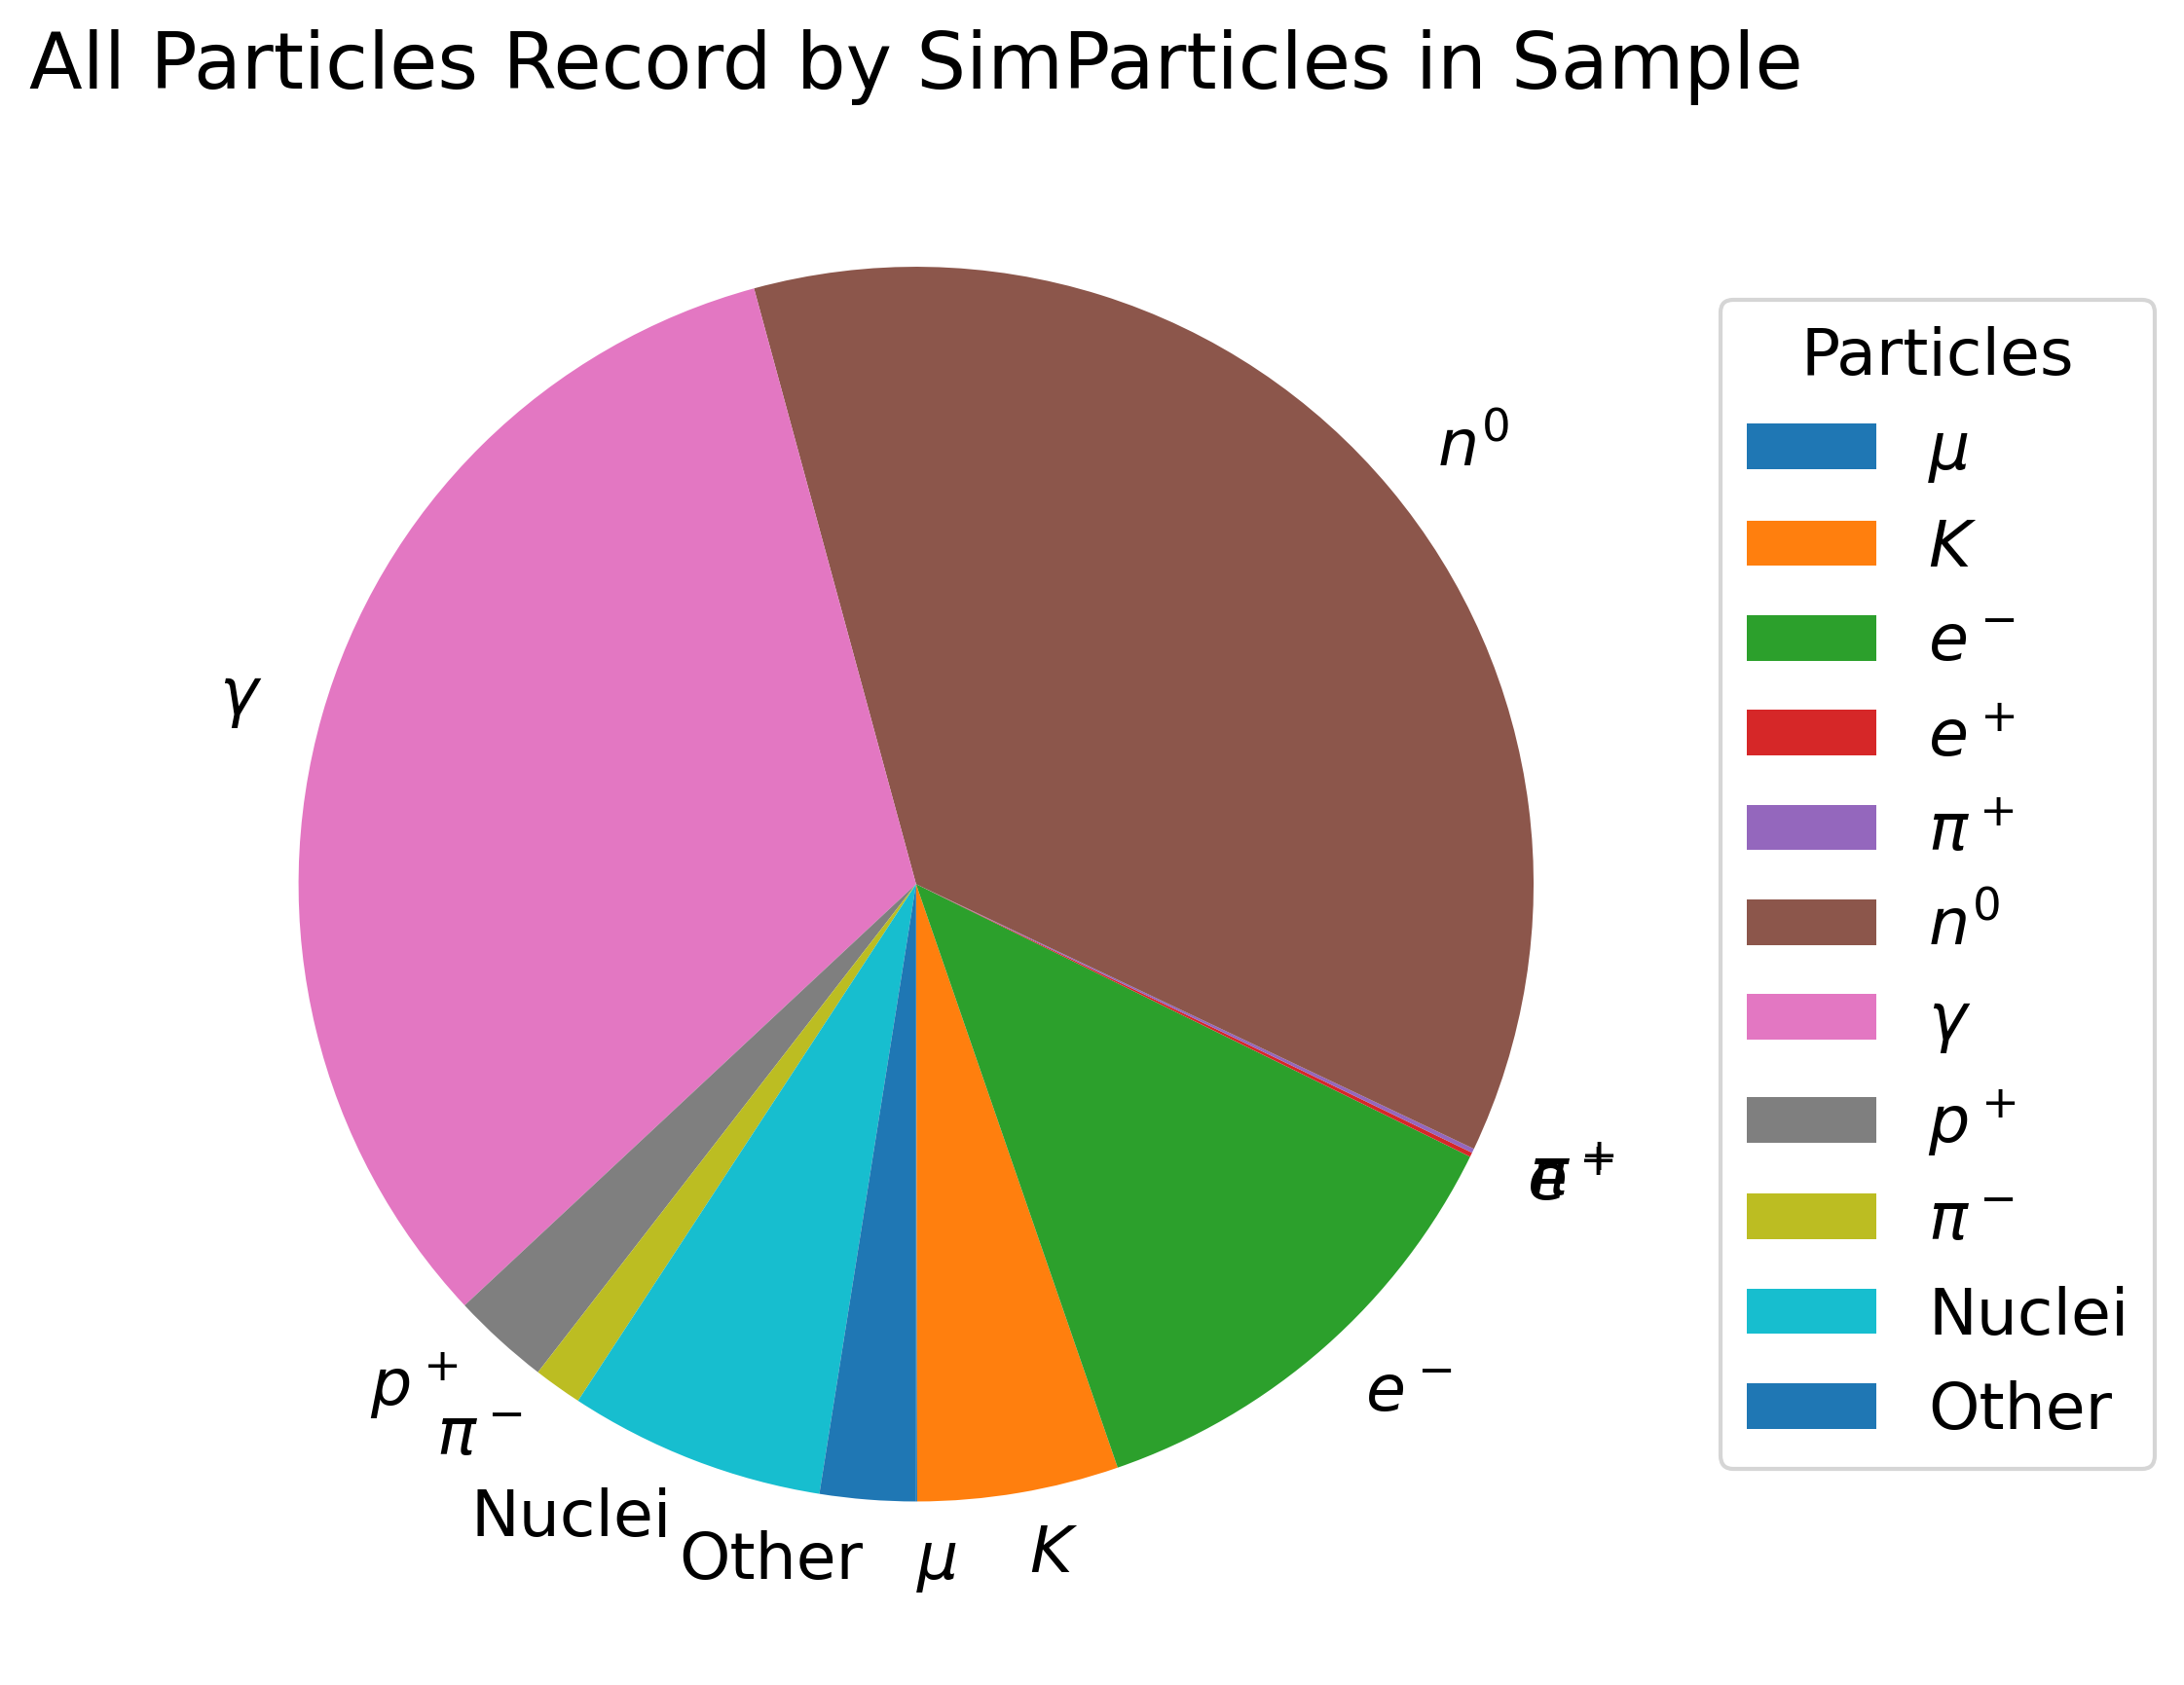

In [9]:
ids_danyi_fromuproot = np.genfromtxt('/Users/chris/Desktop/ldmx_files/pdgIDs_fromuproot_4gev_1e_tskim_v12_kaons_ldmx-det-v12_bdt_hcal_skimmed.txt',delimiter=',')

def getparticles(pdgids):
    # define particles
    mu = 0
    k = 0
    eminus = 0
    eplus = 0
    gamma = 0
    n0 = 0
    piplus = 0
    piminus = 0 
    pplus = 0
    nuclei = 0 
    others = 0
    print(len(pdgids))
    for i in range(len(pdgids)):
        if pdgids[i] == -13 or pdgids[i] == 13 :
            mu += 1
        elif pdgids[i] == 321 or pdgids[i] == -321:
            k += 1
        elif pdgids[i] == 11:
            eminus += 1
        elif pdgids[i] == -11:
            eplus += 1
        elif pdgids[i] == 22:
            gamma += 1
        elif pdgids[i] == 2112:
            n0 += 1
        elif pdgids[i] == 211:
            piplus += 1
        elif pdgids[i] == 2212:
            pplus += 1
        elif pdgids[i] == -211:
            piminus += 1 
        elif pdgids[i] > 1000000000:
            nuclei +=1
        else:
            others += 1
    pdglist = [mu,k,eminus,eplus,piplus,n0,gamma,pplus,piminus,nuclei,others]
    return pdglist


pcountsdanyi = getparticles(ids_danyi_fromuproot)
print(pcountsdanyi)
pnames = [r'$\mu$',r'$K$',r'$e^-$',r'$e^+$',r'$\pi^+$',r'$n^0$',
             r'$\gamma$', r'$p^+$', r'$\pi^-$','Nuclei','Other' ]

fig, ax = plt.subplots(figsize =(10, 7),dpi=300)
wedges, texts = ax.pie(pcountsdanyi,labels=pnames,startangle=-90)
ax.legend(wedges, pnames,
          title ="Particles",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.title("All Particles Record by SimParticles in Sample")
print(len(ids_danyi_fromuproot))